The dataset we'll use is the '20 Newsgroups' dataset, which is a collection of approximately 20,000 newsgroup documents, partitioned across 20 different newsgroups.

# Part 1: Model Training

In [14]:
# Step 1: Load and Preprocess the Dataset
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

# Load the dataset
newsgroups = fetch_20newsgroups(subset='all', remove=('headers', 'footers', 'quotes'))

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(newsgroups.data, newsgroups.target, test_size=0.2, random_state=42)

# Feature extraction using TF-IDF
vectorizer = TfidfVectorizer(stop_words='english', max_df=0.5, min_df=2)
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)


In [15]:
#Step 2: Train the Logistic Regression Model
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

# Train the model
model = LogisticRegression(random_state=42, max_iter=1000)
model.fit(X_train_tfidf, y_train)

# Evaluate the model
y_pred = model.predict(X_test_tfidf)
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.58      0.59      0.59       151
           1       0.71      0.71      0.71       202
           2       0.73      0.66      0.69       195
           3       0.64      0.68      0.66       183
           4       0.84      0.73      0.78       205
           5       0.83      0.80      0.81       215
           6       0.76      0.70      0.73       193
           7       0.76      0.77      0.77       196
           8       0.46      0.77      0.58       168
           9       0.86      0.84      0.85       211
          10       0.94      0.87      0.90       198
          11       0.91      0.76      0.83       201
          12       0.64      0.72      0.67       202
          13       0.83      0.90      0.87       194
          14       0.75      0.81      0.78       189
          15       0.69      0.81      0.74       202
          16       0.74      0.74      0.74       188
          17       0.84    

In [17]:
# Step 3: Save the Trained Model

import pickle
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

# Save the model and vectorizer to Google Drive
model_save_path = '/content/drive/My Drive/news_group_model.pkl'
vectorizer_save_path = '/content/drive/My Drive/news_group_vectorizer.pkl'

with open(model_save_path, 'wb') as file:
    pickle.dump(model, file)

with open(vectorizer_save_path, 'wb') as file:
    pickle.dump(vectorizer, file)



Mounted at /content/drive


# Part 2:  API Creation with FastAPI

- creat new project (newsgroup)
- connect streamlit environment
- copy paste API code in main
- file ---> new ---> directory ---> model ---> copy paste pickle file
-  new python file ---> streamlit-app.py



In [ ]:
from fastapi import FastAPI
from pydantic import BaseModel
import pickle


app = FastAPI()
# Load the model and vectorizer
model_path = './model/path_to_your_saved_model.pkl'
vectorizer_path = './model/path_to_your_saved_vectorizer.pkl'





class Item(BaseModel):
    text: str

@app.post("/predict")
def predict_text(item: Item):
    text_features = vectorizer.transform([item.text])
    prediction = model.predict(text_features)
    return {"prediction": prediction[0]}


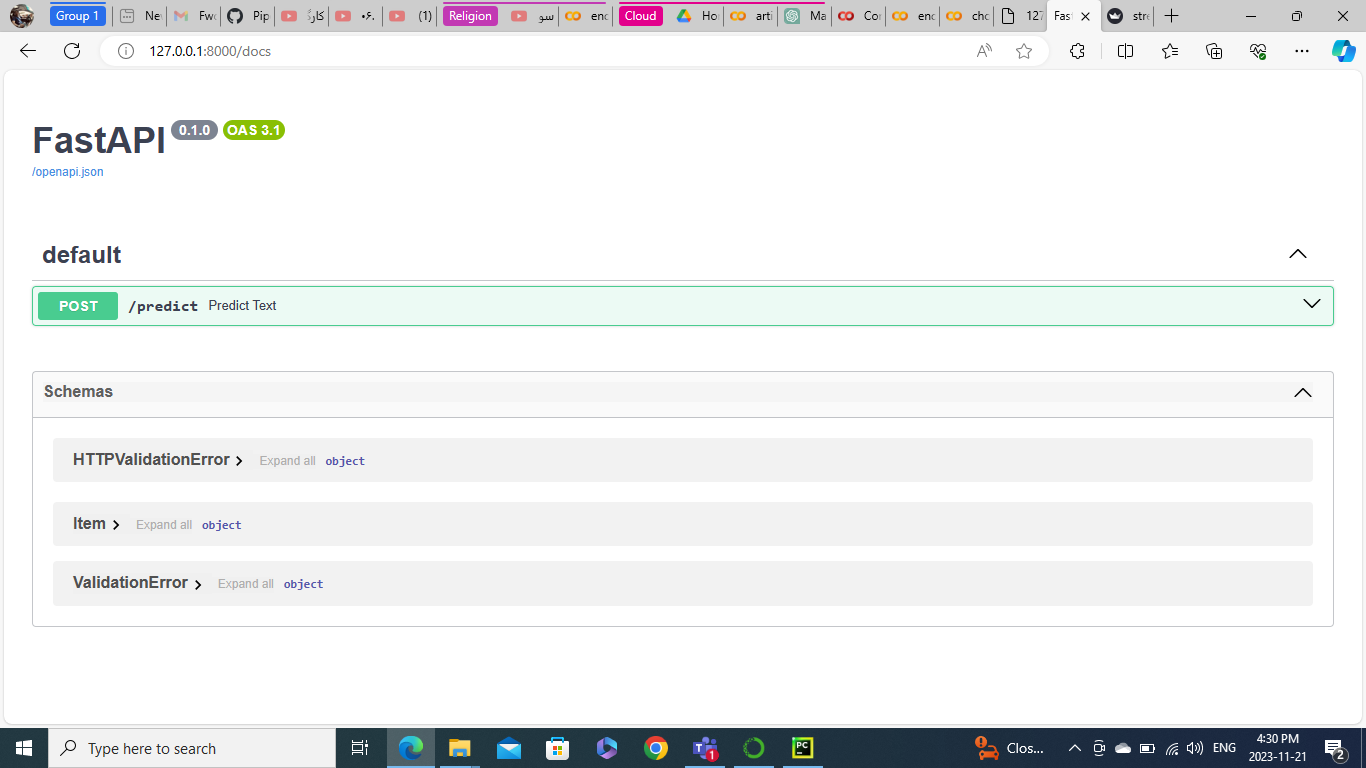

# Part 3: Streamlit Integration

In [ ]:
import streamlit as st
import requests

st.title('Newsgroup Text Classification')

text = st.text_area("Enter Text:", value='', height=None, max_chars=None, key=None)

if st.button('Classify'):
    response = requests.post('http://127.0.0.1:8000/predict', json={'text': text})
    if response.status_code == 200:
        st.write('Predicted Class:', response.json()['prediction'])
    else:
        st.write("Error in API Call")


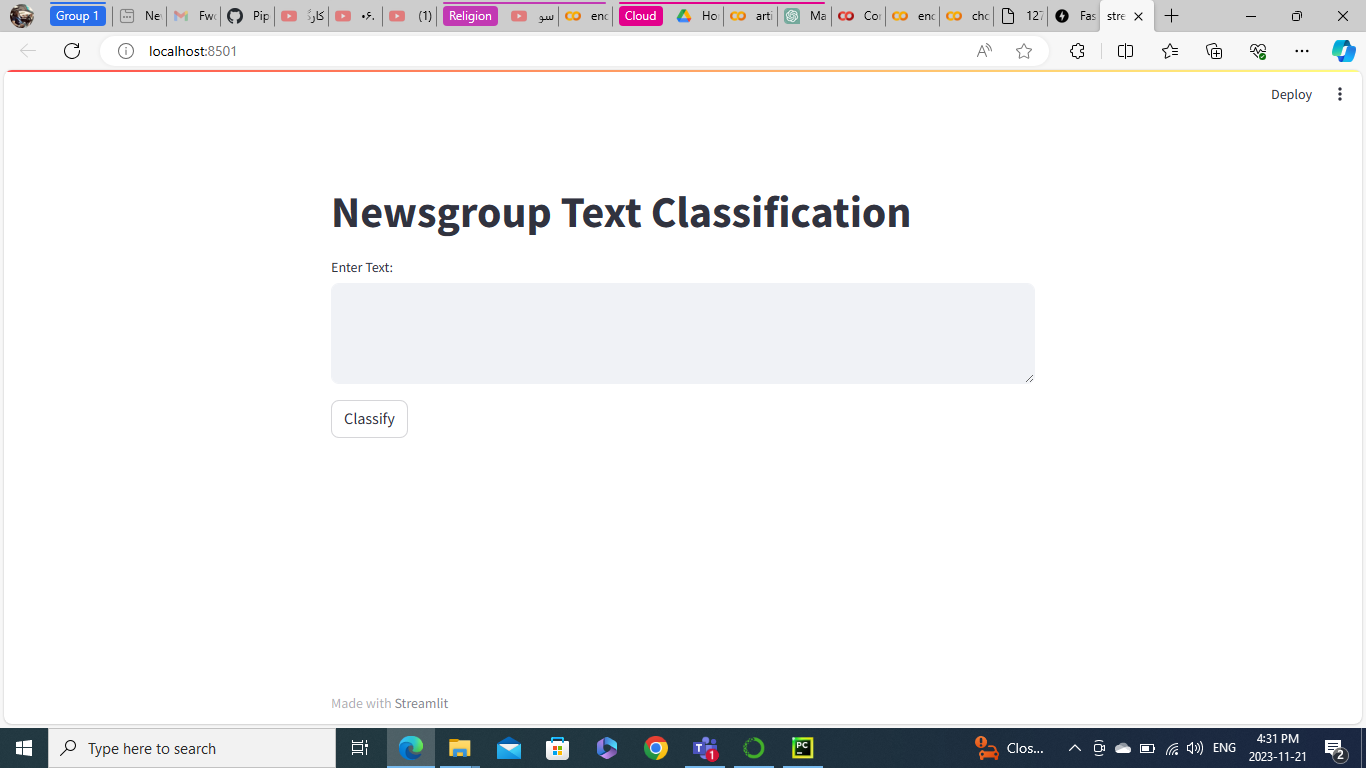